<a href="https://colab.research.google.com/github/anaPK6/Python-Models/blob/main/gaussian.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import plotly.express as px
from plotly.graph_objs import Scatter
from sklearn.mixture import GaussianMixture

# Generate some fake data (jellybeans)
np.random.seed(42)
data = np.concatenate([
    np.random.normal(loc=0, scale=1, size=(100, 2)),  # First group (Strawberry)
    np.random.normal(loc=5, scale=1, size=(100, 2)),  # Second group (Blueberry)
    np.random.normal(loc=10, scale=1, size=(100, 2))  # Third group (Lime)
])

# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)  # We know there are three groups
gmm.fit(data)
labels = gmm.predict(data)  # Which group each jellybean belongs to
means = gmm.means_  # Characteristics of each group
covariances = gmm.covariances_  # How spread out each group is

# Plot the data and the Gaussians
fig = px.scatter(x=data[:, 0], y=data[:, 1], color=labels.astype(str), title="Mixture of Gaussians")
for mean in means:
    fig.add_trace(Scatter(x=[mean[0]], y=[mean[1]], mode='markers',
                          marker=dict(size=10, color='red'),
                          name='Mean'))
fig.show()



In [ ]:
import numpy as np
import plotly.graph_objs as go
import plotly.offline as pyo
from scipy.stats import multivariate_normal

# Generate synthetic data for three flavors
np.random.seed(42)
data_chocolate = np.random.multivariate_normal([7, 3], [[1, 0.5], [0.5, 1]], 30)
data_strawberry = np.random.multivariate_normal([5, 5], [[2, -0.5], [-0.5, 2]], 20)
data_vanilla = np.random.multivariate_normal([9, 2], [[1.5, 0.5], [0.5, 1.5]], 45)
data = np.vstack([data_chocolate, data_strawberry, data_vanilla])

# Calculate the mean and covariance for the entire dataset
mean = np.mean(data, axis=0)
cov = np.cov(data, rowvar=False)

# Create a grid of points over the data range
x, y = np.meshgrid(np.linspace(data[:, 0].min() - 1, data[:, 0].max() + 1, 100),
                   np.linspace(data[:, 1].min() - 1, data[:, 1].max() + 1, 100))
pos = np.dstack((x, y))

# Compute the PDF of the single multivariate Gaussian
rv = multivariate_normal(mean, cov)
z = rv.pdf(pos)

# Plot the data points
fig = go.Figure()

# Add scatter plot of the data points
fig.add_trace(go.Scatter(x=data[:, 0], y=data[:, 1], mode='markers', name='Data Points'))

# Add contour plot for the Gaussian PDF
fig.add_trace(go.Contour(x=x[0], y=y[:, 0], z=z, contours=dict(coloring='heatmap', showlines=False), name='PDF'))

fig.update_layout(title='Single Multivariate Gaussian Fit to All Data',
                  xaxis_title='Sweetness',
                  yaxis_title='Color Intensity',
                  showlegend=True)

pyo.iplot(fig)


GMM and MultiVariate Gaussian Distribution from same data...

In [ ]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Generate synthetic data for three flavors (Chocolate, Strawberry, Vanilla)
np.random.seed(42)
data_chocolate = np.random.multivariate_normal([7, 3], [[1, 0.5], [0.5, 1]], 30)
data_strawberry = np.random.multivariate_normal([5, 5], [[2, -0.5], [-0.5, 2]], 20)
data_vanilla = np.random.multivariate_normal([9, 2], [[1.5, 0.5], [0.5, 1.5]], 45)
data = np.vstack([data_chocolate, data_strawberry, data_vanilla])

# Calculate the overall mean and covariance matrix
mean = np.mean(data, axis=0)
cov = np.cov(data, rowvar=False)

# Create a grid of points for plotting the multivariate Gaussian
x, y = np.meshgrid(np.linspace(data[:, 0].min() - 1, data[:, 0].max() + 1, 100),
                   np.linspace(data[:, 1].min() - 1, data[:, 1].max() + 1, 100))
pos = np.dstack((x, y))

# Define the multivariate normal distribution
from scipy.stats import multivariate_normal
rv = multivariate_normal(mean, cov)
z = rv.pdf(pos)

# Create the figure
fig = make_subplots(rows=2, cols=2,
                    specs=[[{'type': 'scatter3d'}, {'type': 'scatter'}],
                           [{'type': 'scatter'}, {'type': 'scatter'}]])

# 3D Surface plot of the multivariate Gaussian
fig.add_trace(go.Surface(z=z, x=x, y=y, colorscale='Viridis', showscale=False), row=1, col=1)

# Marginal distributions (univariate projections)
fig.add_trace(go.Histogram(x=data[:, 0], nbinsx=30, histnorm='probability density', name='X-axis', marker=dict(color='blue'), opacity=0.7), row=1, col=2)
fig.add_trace(go.Histogram(y=data[:, 1], nbinsy=30, histnorm='probability density', name='Y-axis', marker=dict(color='red'), opacity=0.7, orientation='h'), row=2, col=1)

# Hide empty subplot
fig.update_xaxes(showgrid=False, zeroline=False, showline=False, showticklabels=False, row=2, col=2)
fig.update_yaxes(showgrid=False, zeroline=False, showline=False, showticklabels=False, row=2, col=2)

fig.update_layout(height=800, width=1000, title_text="Bivariate Gaussian with Marginal Distributions")
fig.show()


In [ ]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Generate x values
x = np.linspace(-10, 10, 400)

# Define functions
f_positive_slope = x + 2      # Positive slope
f_negative_slope = -x + 2     # Negative slope
f_convex = x**2               # Second derivative positive (convex)
f_concave = -x**2             # Second derivative negative (concave)

# Create subplots
fig = make_subplots(rows=2, cols=2, subplot_titles=("Positive Slope", "Negative Slope", "Convex (2nd Derivative Positive)", "Concave (2nd Derivative Negative)"))

# Plot Positive Slope
fig.add_trace(go.Scatter(x=x, y=f_positive_slope, mode='lines', name='Positive Slope'), row=1, col=1)

# Plot Negative Slope
fig.add_trace(go.Scatter(x=x, y=f_negative_slope, mode='lines', name='Negative Slope'), row=1, col=2)

# Plot Convex Function
fig.add_trace(go.Scatter(x=x, y=f_convex, mode='lines', name='Convex Function'), row=2, col=1)

# Plot Concave Function
fig.add_trace(go.Scatter(x=x, y=f_concave, mode='lines', name='Concave Function'), row=2, col=2)

# Update layout
fig.update_layout(title='First and Second Derivative Visualizations', height=600, showlegend=False)

# Show plot
fig.show()


In [ ]:
import numpy as np
import plotly.graph_objs as go
from plotly.subplots import make_subplots

# Generate x values
x = np.linspace(-10, 10, 400)

# Define functions
f_positive_slope = x + 2            # Positive slope
f_negative_slope = -x + 2           # Negative slope
f_convex = x**2                     # Second derivative positive (convex)
f_concave = -x**2                   # Second derivative negative (concave)

# Additional functions
f_pos_slope_neg_curve = x - 0.1*x**2 # Positive slope, negative curvature
f_neg_slope_pos_curve = -x + 0.1*x**2 # Negative slope, positive curvature

# Create subplots
fig = make_subplots(rows=3, cols=2, subplot_titles=(
    "Positive Slope: f(x) = x + 2",
    "Negative Slope: f(x) = -x + 2",
    "Convex: f(x) = x^2",
    "Concave: f(x) = -x^2",
    "Positive Slope, Negative Curvature: f(x) = x - 0.1*x^2",
    "Negative Slope, Positive Curvature: f(x) = -x + 0.1*x^2"
))

# Plot Positive Slope
fig.add_trace(go.Scatter(x=x, y=f_positive_slope, mode='lines', name='Positive Slope: f(x) = x + 2'), row=1, col=1)

# Plot Negative Slope
fig.add_trace(go.Scatter(x=x, y=f_negative_slope, mode='lines', name='Negative Slope: f(x) = -x + 2'), row=1, col=2)

# Plot Convex Function
fig.add_trace(go.Scatter(x=x, y=f_convex, mode='lines', name='Convex: f(x) = x^2'), row=2, col=1)

# Plot Concave Function
fig.add_trace(go.Scatter(x=x, y=f_concave, mode='lines', name='Concave: f(x) = -x^2'), row=2, col=2)

# Plot Positive Slope, Negative Curvature
fig.add_trace(go.Scatter(x=x, y=f_pos_slope_neg_curve, mode='lines', name='Positive Slope, Negative Curvature: f(x) = x - 0.1*x^2'), row=3, col=1)

# Plot Negative Slope, Positive Curvature
fig.add_trace(go.Scatter(x=x, y=f_neg_slope_pos_curve, mode='lines', name='Negative Slope, Positive Curvature: f(x) = -x + 0.1*x^2'), row=3, col=2)

# Update layout
fig.update_layout(title='First and Second Derivative Visualizations', height=900, showlegend=False)

# Show plot
fig.show()



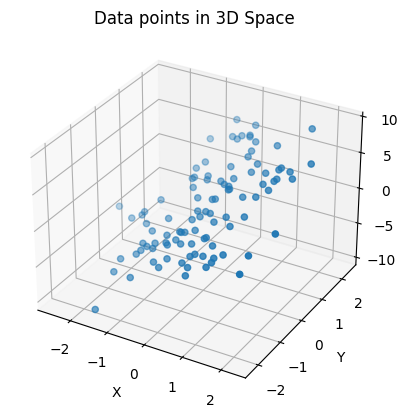

Explained variance ratios: [9.46180633e-01 5.38193670e-02 4.14195126e-33]
Total variance explained by the first two components: 1.0


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

# Generate data points in 3D
np.random.seed(0)
n_samples = 100
x = np.random.normal(0, 1, n_samples)
y = np.random.normal(0, 1, n_samples)
z = 2 * x + 3 * y  # Linearly dependent on x and y, hence data lies on a plane

data = np.vstack((x, y, z)).T

# Plot the 3D data points
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data[:, 0], data[:, 1], data[:, 2])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.title('Data points in 3D Space')
plt.show()

# PCA to demonstrate that data lies in a lower-dimensional subspace
pca = PCA(n_components=3)
pca.fit(data)

explained_variance = pca.explained_variance_ratio_
print(f"Explained variance ratios: {explained_variance}")

# The sum of the first two explained variances should be close to 1, indicating a 2D subspace
print(f"Total variance explained by the first two components: {explained_variance[:2].sum()}")


In [ ]:
from sklearn.mixture import GaussianMixture

# Fit a Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, random_state=42)
gmm.fit(data)
labels = gmm.predict(data)  # Assign each data point to a component
means = gmm.means_  # Mean of each component
covariances = gmm.covariances_  # Covariance of each component

# Plot the data points with their assigned labels
fig = go.Figure()

# Add scatter plot of the data points, colored by their GMM component label
fig.add_trace(go.Scatter(x=data[:, 0], y=data[:, 1], mode='markers', marker=dict(color=labels, showscale=True),
                         name='Data Points'))

# Add the means of the GMM components
for mean in means:
    fig.add_trace(go.Scatter(x=[mean[0]], y=[mean[1]], mode='markers',
                             marker=dict(size=10, color='red'),
                             name='Component Mean'))

fig.update_layout(title='Gaussian Mixture Model',
                  xaxis_title='Sweetness',
                  yaxis_title='Color Intensity',
                  showlegend=True)

pyo.iplot(fig)
